# Frequencey Distribution

In [9]:
import json
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import collections
import matplotlib.pyplot as plt

In [10]:


# Load the data from the JSON file
with open("C:/Users/kjson/Desktop/NLP ACT 2/activity_2.json", "r") as f:
    datastore = json.load(f)

sentences = []
labels = []

for item in datastore:
    sentences.append(item["review"])
    labels.append(item["is_positive"])

# Tokenize the sentences
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(sentences)
padded_sequences = pad_sequences(sequences, maxlen=100, truncating="post", padding="post")


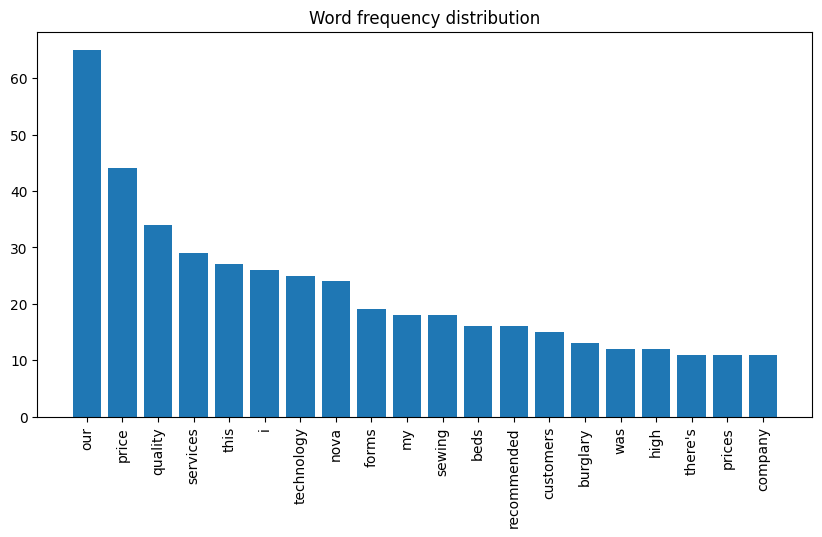

In [17]:


# Plot the word frequency distribution
all_tokens = [token for sequence in sequences for token in sequence]
token_counts = collections.Counter(all_tokens)
counts = [token_counts[token] for token in token_counts.keys()]
indices = np.argsort(counts)[::-1][:20]  # choose top 50 most frequent words
sorted_counts = [counts[idx] for idx in indices]
sorted_tokens = [list(tokenizer.word_index.keys())[list(tokenizer.word_index.values()).index(idx)] for idx in indices]

plt.figure(figsize=(10,5))
plt.bar(range(len(sorted_counts)), sorted_counts)
plt.xticks(range(len(sorted_counts)), sorted_tokens, rotation=90)
plt.title('Word frequency distribution')
plt.show()

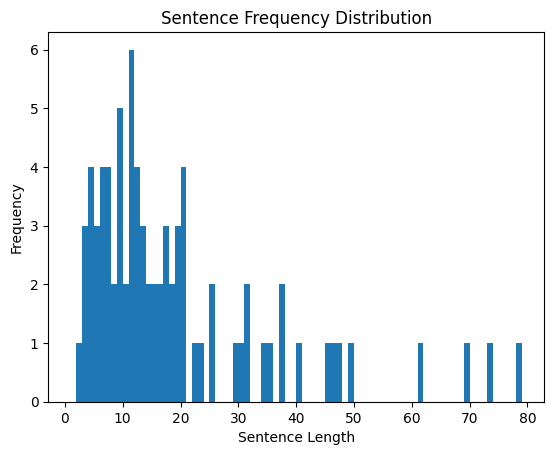

In [12]:
# Calculate the maximum length of a sentence
max_length = max([len(row[row != 0]) for row in padded_sequences])

# Plot the sentence frequency distribution
plt.hist([len(row[row != 0]) for row in padded_sequences], bins=range(1, max_length+1))
plt.xlabel('Sentence Length')
plt.ylabel('Frequency')
plt.title('Sentence Frequency Distribution')
plt.show()


In [13]:
# Separate the sequences and labels based on the "is_positive" value
positive_sequences = []
negative_sequences = []
for item in datastore:
    sequence = tokenizer.texts_to_sequences([item["review"]])[0]
    if item["is_positive"]:
        positive_sequences.append(sequence)
    else:
        negative_sequences.append(sequence)

In [14]:
# Compute the frequency distribution of each word in the positive sequences
positive_word_counts = collections.Counter()
for sequence in positive_sequences:
    positive_word_counts.update(sequence)

# Compute the frequency distribution of each word in the negative sequences
negative_word_counts = collections.Counter()
for sequence in negative_sequences:
    negative_word_counts.update(sequence)

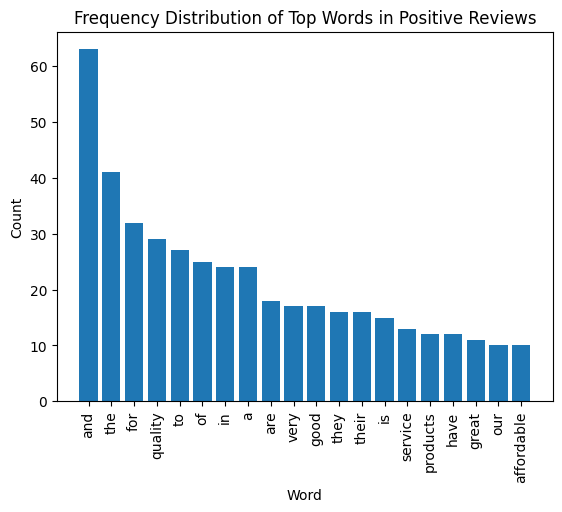

In [15]:
# Display the top 20 most common words in positive reviews
top_positive_words = positive_word_counts.most_common(20)
# Create a dictionary that maps token numbers to words
token_to_word = {token: word for word, token in word_index.items()}
# Create lists of words and their counts for the top 50 words
words = [token_to_word[token] for token, count in top_positive_words]
counts = [count for token, count in top_positive_words]
# Create a bar chart of the word frequency distribution
plt.bar(words, counts, tick_label=words)
plt.xticks(rotation=90)
plt.xlabel('Word')
plt.ylabel('Count')
plt.title('Frequency Distribution of Top Words in Positive Reviews')
plt.show()

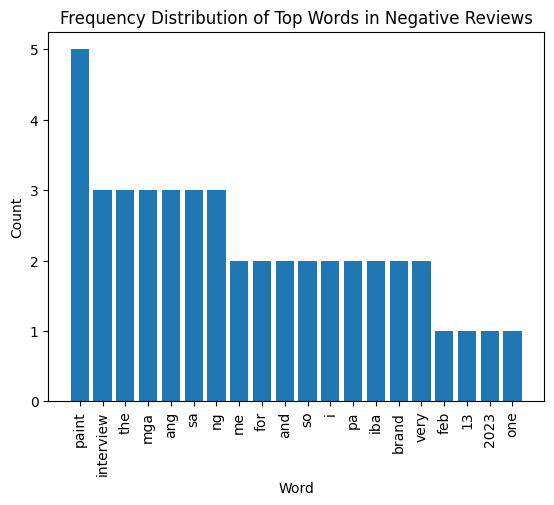

In [18]:
# Display the top 10 most common words in negative reviews
top_negative_words = negative_word_counts.most_common(20)
# Create a dictionary that maps token numbers to words
token_to_word = {token: word for word, token in word_index.items()}
# Create lists of words and their counts for the top 50 words
words = [token_to_word[token] for token, count in top_negative_words]
counts = [count for token, count in top_negative_words]
# Create a bar chart of the word frequency distribution
plt.bar(words, counts, tick_label=words)
plt.xticks(rotation=90)
plt.xlabel('Word')
plt.ylabel('Count')
plt.title('Frequency Distribution of Top Words in Negative Reviews')
plt.show()